## Seaborn Tutorial

Seaborn is a powerful data visualization library that provides a high-level interface to Matplotlib. Seaborn lets you plot attractive charts in a much simpler way. In this section, we'll use a fun Pokemon dataset to explore some of Seaborn's most important features.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
# We will read the csv data into a pandas dataframe
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='unicode_escape')

df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Here you can see the dataset, which shows us all the attributes of each Pokemon, such as the Type, HP, Attack score, and Defense score. Using Seaborn, we'll use these attributes to make some interesting visualizations.

## Scatter Plots

Making a scatter plot in Seaborn takes just one line of code using the lmplot() function. To do so, we pass in the dataframe to the data argument, and then we pass in the column names for the x and y axes. <br> By default, the scatter plot also displays a regression line, which is simply a line that best fits the data.

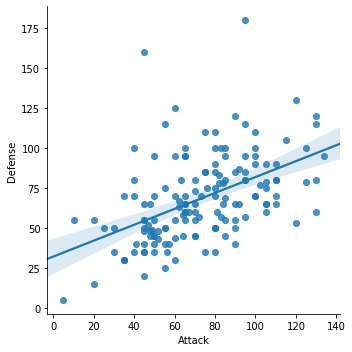

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df)

plt.show()

To remove the regression line, we can set the fit_reg argument to False. We can also set hue='Stage' to color the points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

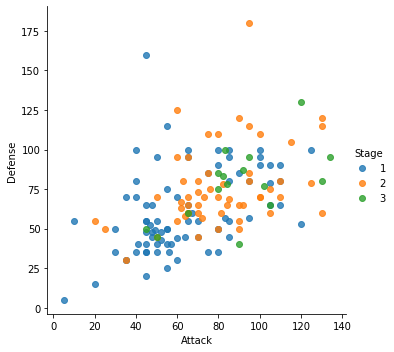

In [14]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

plt.show()

## Box Plots
A boxplot is one of the most important graphs of displaying the distribution of data. <br> With Seaborn it only takes one line to make a boxplot using the boxplot function. In this example, we'll use the whole dataframe except for the Total, Stage, and Legendary attributes. 

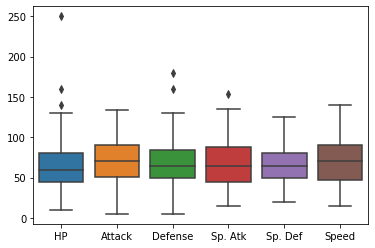

In [15]:
# Make a copy of the original DF without the 3 attributes
df_copy = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using df_copy
sns.boxplot(data=df_copy)

plt.show()

A boxplot is based on a five number summary which are each displayed as different lines. The middle line is the median value, which is the point where the data is centered around. The bottom and top most lines are the median of quartile 1 and 4, which basically show the minimum and maximum of the distribution. The two lines in between are the median of quartile 2 and 3, which show how much the values vary from the median. The single points show any outliers in the data.

## Violin Plots
Violin plots are useful alternatives to box plots. They show the distribution through the thickness of the violin instead of only the summary statistics. In this example, we'll use the same dataframe copy from the last boxplot example.

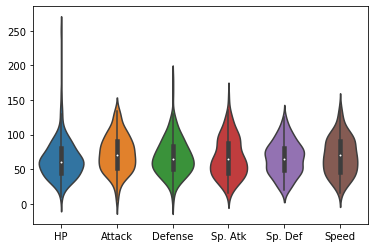

In [16]:
sns.violinplot(data=df_copy)

plt.show()

You can see the distribution of values for each attribute of the Pokemon. The areas where the violin is thicker means that there is a higher density of values.

Now we'll visualize the distribution of Attack stats compared to the Pokemon's primary type.

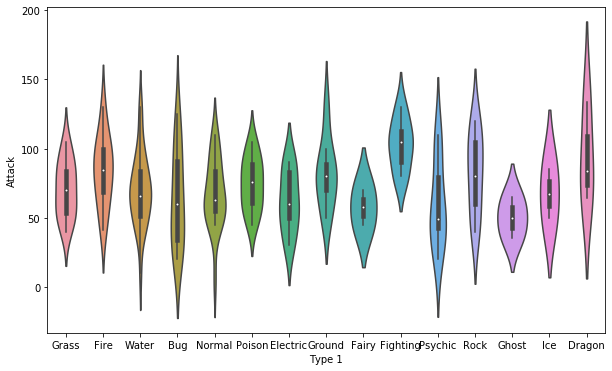

In [17]:
plt.figure(figsize=(10,6))  # Resize the figure to be bigger

sns.violinplot(x='Type 1', y='Attack', data=df)

plt.show()

As you can see, Dragon type Pokemon tend to have highest Attack stats, but they also have a high variance.

## Heatmap
Heatmaps help you visualize matrix-type data. For example, we can visualize the correlations between all the attributes of the Pokemon.

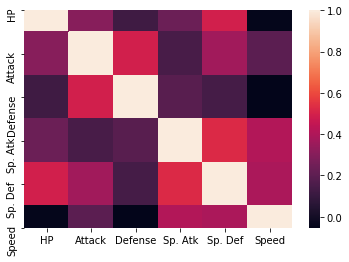

In [18]:
# Calculate correlations
corr = df_copy.corr()
 
# Create the Heatmap
sns.heatmap(corr)

plt.show()

As you can see, the lighter the color of a box, the higher the correlation is between those two attributes. <br>For example, the correlation between the HP and overall Speed of a Pokemon is very low, hence the dark color of the box. <br>The corellation between the HP and Speed of Defense is quite high, hence the lighter shade of red.

## Histogram
Histograms allow you to plot the distributions of numeric values. It only takes one line to create a Histogram with Seaborn, whereas with Matplotlib it took a bit more work.
<br> As an example, we can make a histogram to plot the distribution of values for the Attack attribute.

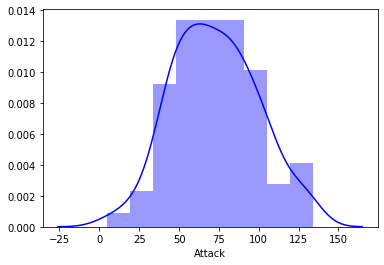

In [19]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack, color='blue')

plt.show()

We can see here that most Pokemon have attack values in the range between 50 and 100. 

## Count Plots
Similar to bar graphs, count plots let you visualize the distrubutions of category variable. For example, I could use a count plot to see how many Pokemon there are in each primary type.

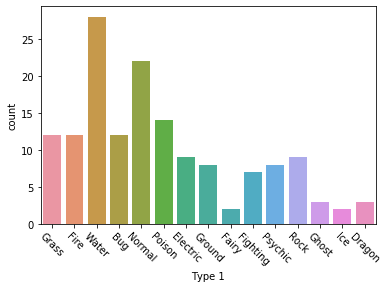

In [20]:
sns.countplot(x='Type 1', data=df)
 
# Rotate the x-labels to see them easily
plt.xticks(rotation=-45)

plt.show()

We can see that the Water type has the most Pokemon, and the Fairy and Ice types have the least.

## Density Plots
Density plots display the distribution between two variables. For instance, we can use a denisty plot to compare two attributes of a Pokemon such as the Attack and Defense values. For our example, we'll use the jointplot() function to do this.

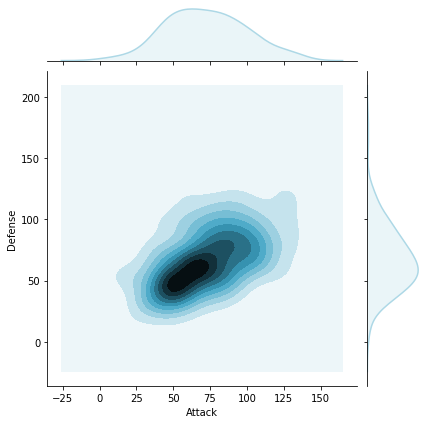

In [21]:
sns.jointplot(df.Attack, df.Defense, kind='kde', color='lightblue')

plt.show()

The plot areas vary in darkness depending on how many values are in the area. When an area is very dark, it signals that there is a strong relationship. From this plot, we can see that when attack values are in the range between 50 and 75, defense values tend to be around 50.